# Zadanie 1b  
Celem ćwiczeń jest implementacja metody gradientu prostego.

Należy zaimplementować metodę gradientu prostego, służącą do znajdywania minimum lokalnego zadanej funkcji celu:

$$\theta_{t+1}=\theta_{t} - \eta\nabla f(\theta_{t})$$
gdzie:
- $f(\theta_{t})$ to funkcja celu dla której szukamy minimum,
- $\theta_{t}$ to parametry funkcji celu w kroku $t$,
- $\eta$ to współczynnik uczenia definiujący tempo zmiany parametrów (ang. learning rate), który powinien być skalarem o niskiej wartości.

W ćwiczeniu należy zaimplementować tę metodę do znalezienia minimów lokalnych dwóch funkcji (podanych poniżej). Dodatkowo należy przebadać wpływ współczynnika uczenia $\eta$  oraz różnych parametrów początkowych $\theta_{t=0}$ na jakość rozwiązania. Należy zwizualizować proces minimalizacji, czyli pośrednie parametry $\theta_{t}$ na wykresie 2D.

W poniższej implementacji należy uzpełnić metody klasy `SimpleGradientDescent` i użyć ich do realizacji zadania.    
  
## Punktacja:    
 - Implementacja kroku gradientu prostego. **1 pkt**  
 - Przeprowadzenie przeszukiwania minimum na obu funkcjach - poprawny wynik. **1 pkt**  
 - Wizualizacja przeszukiwania z wielu miejsc początkowych i dla różnych wartości $\eta$. **2 pkt**


In [3]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

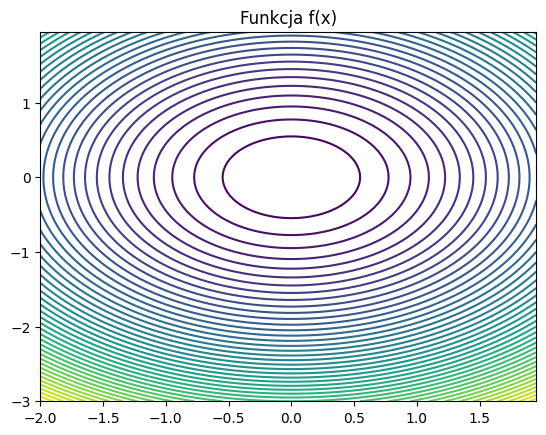

In [4]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Contour plot en 2D
plt.figure()
plt.title("Funkcja f(x)")
plt.contour(X, Y, Z, 50)

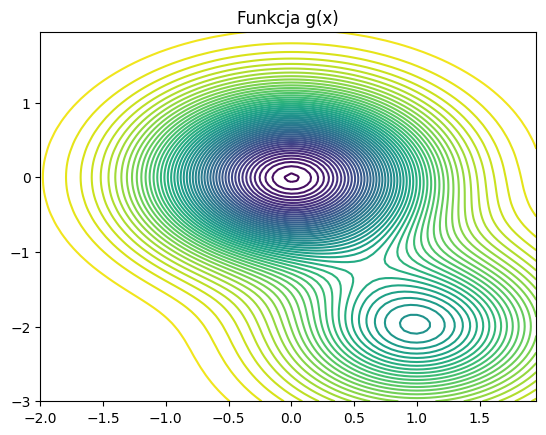

In [5]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.title("Funkcja g(x)")
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [6]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(
        self,
        func: Callable[[float, float], float],
        grad_func: Callable[[float, float], Tuple[float, float]],
        alpha: float = 0.1,
    ):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None  # trace of search

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace) > 0:
            plt.scatter(self.trace[:, 0], self.trace[:, 1], s=10)

    def calculate_func_vale(self, x1: float, x2: float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1: float, x2: float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1: float, x2: float) -> Tuple[float, float]:
        grad_x1, grad_x2 = self.calculate_func_grad(x1, x2)

        new_x1 = x1 - self.alpha * grad_x1
        new_x2 = x2 - self.alpha * grad_x2

        return new_x1, new_x2

    def minimize(
        self,
        x1_init: float,
        x2_init: float,
        steps: int,
        verbose: int = 0,
        plot: bool = False,
    ) -> float:
        
        x1, x2 = x1_init, x2_init
        self.trace = [(x1, x2)]

        for step in range(steps):
            x1, x2 = self.gradient_descent_step(x1, x2)
            self.trace.append((x1, x2))

            if verbose and step % verbose == 0:
                print(f'Step {step}: x1 = {x1:.4f}, x2 = {x2:.4f}, f(x)={self.calculate_func_vale(x1, x2):.4f}')
        
        if plot:
            self.trace = np.array(self.trace)
            self.plot_func()
        
        return self.calculate_func_vale(x1, x2)


# Rozwiązanie

In [7]:
class Function:
    @staticmethod
    def f_func(x1, x2):
        return x1**2 + x2**2

    @staticmethod
    def f_func_grad(x1, x2):
        return 2*x1, 2*x2
    
    @staticmethod
    def g_func(x1, x2):
        return 1.5-np.exp(-x1**(2)-x2**(2))-0.5*np.exp(-(x1-1)**(2)-(x2+2)**(2))

    @staticmethod
    def g_func_grad(x1, x2):
        return (
            2 * x1 * np.exp(-x1**(2)-x2**(2)) + (x1 - 1)*np.exp(-(x1-1)**(2)-(x2+2)**(2)),
            2 * x2 * np.exp(-x1**(2)-x2**(2)) + (x2 + 2)*np.exp(-(x1-1)**(2)-(x2+2)**(2))
        )


## Funkcja 1

Step 0: x1 = 0.4000, x2 = 0.8000, f(x)=0.8000
Step 10: x1 = 0.0429, x2 = 0.0859, f(x)=0.0092
Step 20: x1 = 0.0046, x2 = 0.0092, f(x)=0.0001
Step 30: x1 = 0.0005, x2 = 0.0010, f(x)=0.0000
Step 40: x1 = 0.0001, x2 = 0.0001, f(x)=0.0000
Step 0: x1 = 0.9800, x2 = 0.9800, f(x)=1.9208
Step 10: x1 = 0.8007, x2 = 0.8007, f(x)=1.2823
Step 20: x1 = 0.6543, x2 = 0.6543, f(x)=0.8561
Step 30: x1 = 0.5346, x2 = 0.5346, f(x)=0.5715
Step 40: x1 = 0.4368, x2 = 0.4368, f(x)=0.3816
Step 0: x1 = -0.4500, x2 = 0.4500, f(x)=0.4050
Step 10: x1 = -0.1569, x2 = 0.1569, f(x)=0.0492
Step 20: x1 = -0.0547, x2 = 0.0547, f(x)=0.0060
Step 30: x1 = -0.0191, x2 = 0.0191, f(x)=0.0007
Step 40: x1 = -0.0067, x2 = 0.0067, f(x)=0.0001
Step 0: x1 = -0.9800, x2 = -0.9800, f(x)=1.9208
Step 10: x1 = -0.8007, x2 = -0.8007, f(x)=1.2823
Step 20: x1 = -0.6543, x2 = -0.6543, f(x)=0.8561
Step 30: x1 = -0.5346, x2 = -0.5346, f(x)=0.5715
Step 40: x1 = -0.4368, x2 = -0.4368, f(x)=0.3816
Step 0: x1 = 1.2000, x2 = -1.2000, f(x)=2.8800
St

8

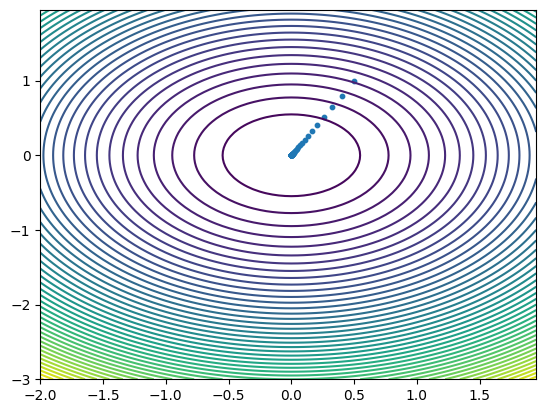

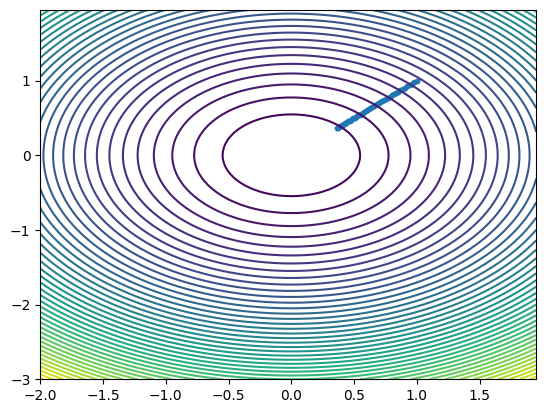

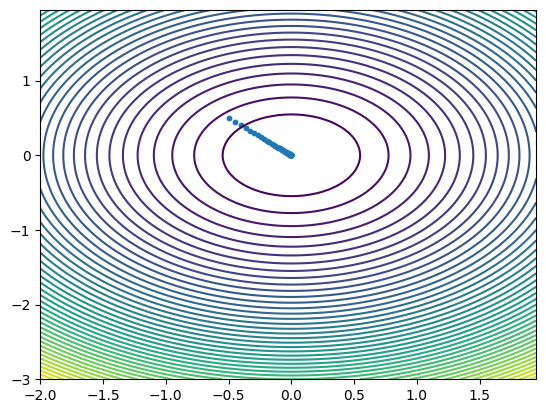

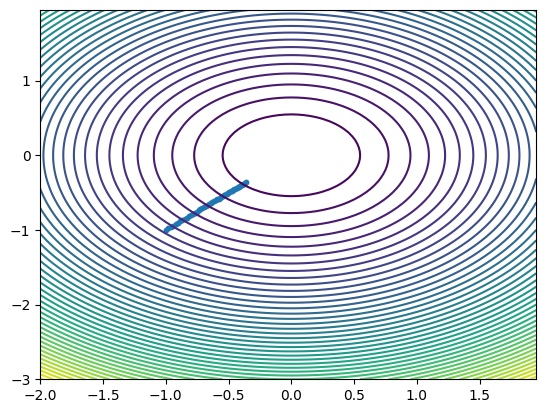

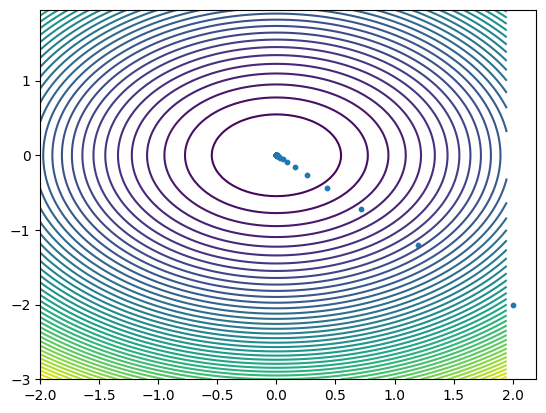

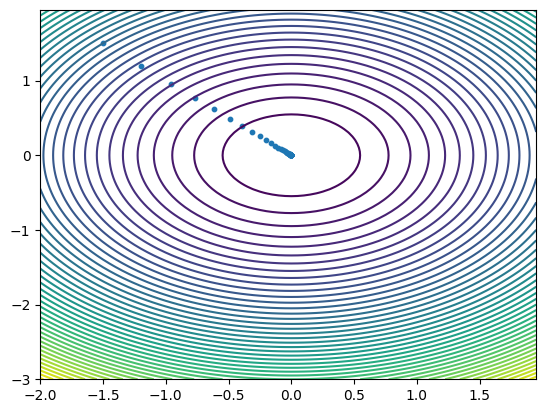

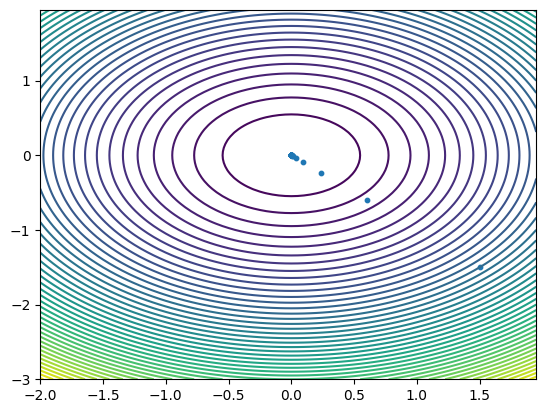

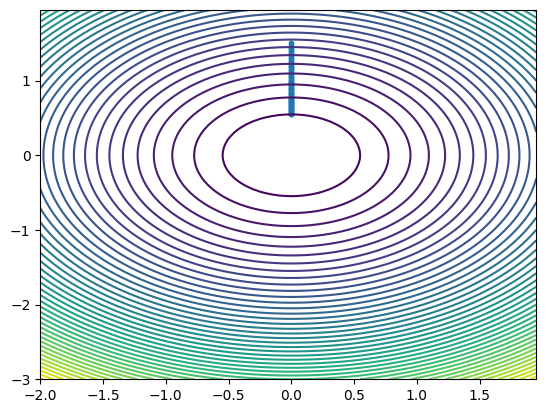

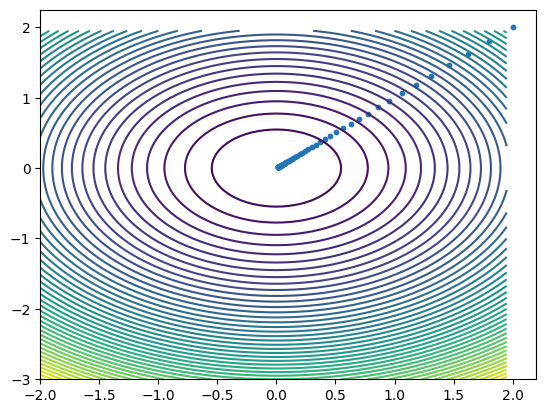

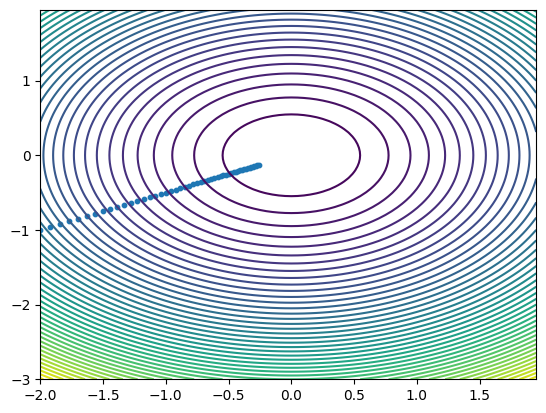

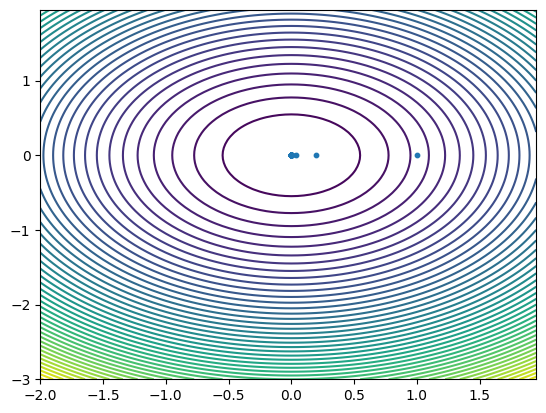

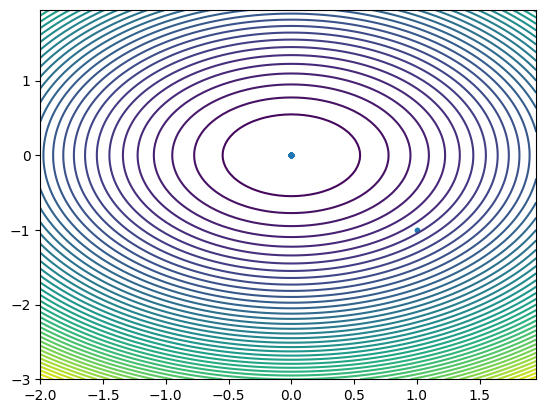

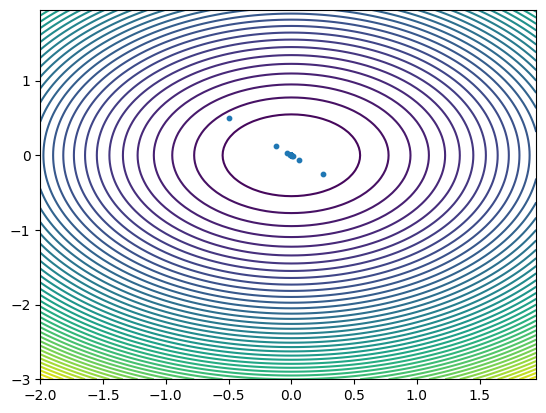

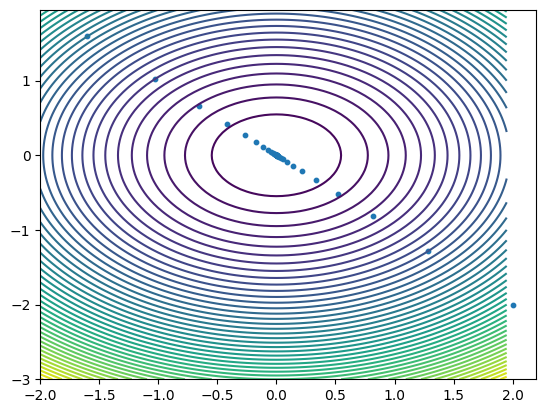

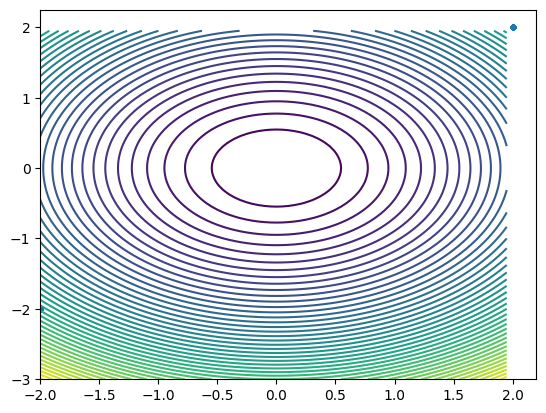

In [10]:

sgd = SimpleGradientDescent(Function.f_func, Function.f_func_grad, 0.1)

# Test 1: η=0.1, θt=0=(0.5,1)
sgd.alpha=0.1
sgd.minimize(x1_init=0.5, x2_init=1, steps=50, verbose=10, plot=True)

# Test 2: η=0.01, θt=0=(1,1)
sgd.alpha=0.01
sgd.minimize(x1_init=1, x2_init=1, steps=50, verbose=10, plot=True)

# Test 3: η=0.05, θt=0=(−0.5,0.5)
sgd.alpha=0.05
sgd.minimize(x1_init=-0.5, x2_init=0.5, steps=50, verbose=10, plot=True)

# Test 4: η=0.01, θt=0=(−1,−1)
sgd.alpha=0.01
sgd.minimize(x1_init=-1, x2_init=-1, steps=50, verbose=10, plot=True)

# Test 5: η=0.2, θt=0=(2,−2)
sgd.alpha=0.2
sgd.minimize(x1_init=2, x2_init=-2, steps=50, verbose=10, plot=True)

# Test 6: η=0.1, θt=0=(−1.5,1.5)
sgd.alpha=0.1
sgd.minimize(x1_init=-1.5, x2_init=1.5, steps=50, verbose=10, plot=True)

# Test 7: η=0.3, θt=0=(1.5,−1.5)
sgd.alpha=0.3
sgd.minimize(x1_init=1.5, x2_init=-1.5, steps=50, verbose=10, plot=True)

# Test 8: η=0.01, θt=0=(0,1.5)
sgd.alpha=0.01
sgd.minimize(x1_init=0, x2_init=1.5, steps=50, verbose=10, plot=True)

# Test 9: η=0.05, θt=0=(2,2)
sgd.alpha=0.05
sgd.minimize(x1_init=2, x2_init=2, steps=50, verbose=10, plot=True)

# Test 10: η=0.02, θt=0=(−2,−1)
sgd.alpha=0.02
sgd.minimize(x1_init=-2, x2_init=-1, steps=50, verbose=10, plot=True)

# Test 11: η=0.4, θt=0=(1,0)
sgd.alpha=0.4
sgd.minimize(x1_init=1, x2_init=0, steps=50, verbose=10, plot=True)

# Test 12: η=0.5, θt=0=(1,−1)
sgd.alpha=0.5
sgd.minimize(x1_init=1, x2_init=-1, steps=50, verbose=10, plot=True)

# Test 13: η=0.75, θt=0=(−0.5,0.5)
sgd.alpha=0.75
sgd.minimize(x1_init=-0.5, x2_init=0.5, steps=50, verbose=10, plot=True)

# Test 14: η=0.9, θt=0=(2,−2)
sgd.alpha=0.9
sgd.minimize(x1_init=2, x2_init=-2, steps=50, verbose=10, plot=True)

# Test 15: η=1.0, θt=0=(−2,2)
sgd.alpha=1
sgd.minimize(x1_init=-2, x2_init=-2, steps=50, verbose=10, plot=True)

## Funkcja 2